## Network Science Project 2 (version 2)
### Autumn 2021
### Due: December 17th, 4:00pm GMT

Name: Dai Wang            
CID: 01844537

Please enter your name and 8-digit college ID in the cell above

In [1]:
# Do not modify this cell or import any other modules
# without explicit permission. 
# You should run this cell before running the code below.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.linalg import eigh
#You may also use scipy as needed

### Overview

When working on real-world problems, we often encounter *weighted* networks. In this assignment, you will work through a set of tasks using data for a weighted undirected network where the nodes correspond to regions of the human brain with particular functions, and weighted links indict the density of neuron fiber pathways between regions. You have been provided with the *weight matrix*, $\rm W$, for the network which is defined as follows: $W_{ij}=0$ indicates that there are no connections between regions $i$ and $j$. If $i$ and $j$ are connected, $W_{ij}$ contains the density of connections which can be considered to be an estimate of how much current can flow between the two regions. The only other information about the human brain that is needed for this assignment is that it consists of two parts, a left and right hemisphere.

Code for loading $\rm W$ is provided in the cell below. The file should be save in the same folder as this notebook. Please check that you can load the file, and ask for help if you cannot. The corresponding graph has $N=467$ nodes.

In [2]:
#load weight matrix and output shape
W = np.load('Wproject2.npy')
print("Shape of W is:", W.shape)

Shape of W is: (467, 467)


### Part 1
In lecture 14, the spectral method for community detection in unweighted, undirected graphs was discussed. Here, you will develop code for this method modified for weighted undirected graphs. The code will compute an $N$-element vector, $\rm s$ where $s_i=\pm 1$ and indicates which community node $i$ has been assigned to. The method requires a modification to the definition of the modularity matrix. Let $\tilde k_i = \sum_{j=1}^N W_{ij}$, and $\tilde K = \sum_{i=1}^N \tilde k_i$. The modified modularity matrix is defined as: $$\tilde B_{ij} = W_{ij}-\frac{\tilde k_i \tilde k_j}{\tilde K}$$. The modified spectral method then requires the following steps:
1. Find the $N$-element vector $\rm x$ with $\textrm{x}^T \textrm{x}=N$ which maximizes $\textrm{x}^T \tilde{\textrm{B}} \textrm{x}$ 
2. Adjust $\rm x$ to construct $\rm s$ in the same way that $\tilde{\textrm{s}}$ is adjusted to obtain $\rm s$ for the unweighted case.

Note that the modularity of a set of nodes in a weighted graph, $S_a$, is $\frac{1}{\tilde K}\sum_{i \in S_a} \sum_{j \in S_a} \tilde B_{ij}$.

**1. (a)** (4 pts) Complete the function *spectralW* below so that it **efficiently** applies the modified spectral method to the provided graph and returns both the vector, $\rm s$, and the modified modularity matrix, $\tilde{\textrm{B}}$. The code should not rely on any variables aside from the function input. You may use numpy and scipy as needed, but you should not use any other modules. See the function docstring for further information on the function input and output; please do not modify the input or the return statement. Provide a brief description of your approach in the cell below the function. Note: the code should be designed to work well for general large complex networks such as those listed in table 2.1 of Barabasi's book.

In [3]:
def spectralW(W):
    """Compute partition of weighted undirected network into two communities using modified spectral method.

    Input:
    W: An N x N numpy array corresponding to the network weight matrix

    Output:
    s: An N-element array where each element is +/- 1 and indicates which community each node has been assigned to. 
    
    Btilde: An N x N numpy array corresponding to the modified modularity matrix

    """
    #Use code below as needed
    N = W.shape[0]
    s = np.zeros(N)
    Btilde = np.zeros((N,N))
    #--------------------------
    
    # Creating an array to store the k_i tilde terms
    k_til = np.zeros(N)
    for i in range(N):
        k_til[i-1] = np.sum(W[i-1,])
    
    # Calculating Ktilde
    K_tilde = np.sum(k_til)
    
    # Computing the entries for the modularity matrix
    for i in range(N):
        for j in range(N):
            Btilde[i][j] = W[i][j] - (k_til[i]*k_til[j])/K_tilde
            
    # Compute the largest eigenvalue of Btilde as well as the corresponding eigenvector
    e1,v1 = eigh(Btilde,eigvals=(N-1,N-1))
    e1=e1[0];v1=v1[:,0]
    
    # Adjusting the computed eigenvector so that all entries are 1 or -1
    s = np.ones_like(v1)
    s[v1<0]=-1
   
    return s,Btilde 
    

### Discussion for Q1(a)
The function spectralW takes the weighted matrix of the graph, W, as the argument, and returns the value of $s$, the partition vector, and also the matrix $\tilde{B}$, the modified modularity matrix. My approach to the function is to first calculate the values for $\tilde{k}_i$, and store the outputs in a vector called k_til, so they can be readily accesssed for later use. Then, we will calculate the entries of $\tilde{B}$, by using the equation:
$$\tilde B_{ij} = W_{ij}-\frac{\tilde k_i \tilde k_j}{\tilde K}$$

After we have constructed the $\tilde{B}$ matrix, we compute its largest eigenvalue and the corresponding eigenvector, then we adjust the computed eigenvector such that all its entries are either $-1$ or $1$. The value corresponding to each node denotes which community it has been assigned to. 

**1.(b)** (2 pts) You have been provided with code below to load the array, nLabel; nLabel[i]=1 if node $i$ is in the right hemisphere of the brain, and nLabel[i]=-1 if node $i$ is in the left hemisphere. Treat the hemisphere-based partition as the "correct" partition. Apply the modified spectral method to the provided weight matrix, and compare the computed partition to this hemisphere-based partition. Determine and state what fraction of the nodes in each computed community have been assigned to the correct hemisphere. Add code to the cell below which carries out the needed computations. Note that multiplying $\rm s$ with $(-1)$ also generates a valid partition. You should choose $\rm s$ or $- \rm s$ based on which more-closely matches the correct partition. 

In [4]:
nLabel = np.load('nLabel.npy')
print("Shape of nLabel is:", nLabel.shape)

# If the two partitions agree on a particular node, then the difference between nLabel[i] and s[i] would be 0. Otherwise,
# their difference would be 2 or -2. We will calculate the difference for both partition s and partition -s.

s = spectralW(W)[0]
dif1 = s-nLabel
dif2 = -s-nLabel


N = W.shape[0]
# Counting the number of 1s and -1s in s
n1 = np.count_nonzero(s==1)
n2 = np.count_nonzero(s==-1)

# Obtaining the indices where s is equal to 1 and -1
ind1 = np.where(s==1)[0]
ind2 = np.where(s==-1)[0]

# Creating two empty arrays to store the difference between s[i] and nLabel[i] for all indices i where s[i] is equal to 1.
arr1 = np.zeros(N)
arr2 = np.zeros(N)

# Assigning the array indices to their respective values in s and nLabel
for i in (ind1):
    arr1[i] = 1
    arr2[i] = nLabel[i]

# If the partition for a particular indice don't agree, the difference will be 1-(-1)=2. Dividing the sum of the differences 
# of nodes by 2 will give the number of nodes with different partitions. 
dif1 = 1/2*np.sum((arr1-arr2))

# Calculating the fraction of nodes with the correct partition
c1_1 = (n1-dif1)/n1

# Following a similar procedure for all indices of s where s[i] is equal to -1
arr3 = np.zeros(N)
arr4 = np.zeros(N)

for i in (ind2):
    arr3[i] = -1
    arr4[i] = nLabel[i]
dif2 = abs(1/2*np.sum((arr3-arr4)))
c1_2 = (n2-dif2)/n2

# The fraction of correctly assigned nodes for -s for each community will just be 1-(fraction of correctly assigned nodes by s).
c2_1 = 1-c1_1
c2_2 = 1-c1_2

print('The fraction of correctly assigned nodes in right hemisphere by s is:', c1_1)
print('The fraction of correctly assigned nodes in left hemisphere by s is:', c1_2)
print('The fraction of correctly assigned nodes in right hemisphere by -s is:', c2_1)
print('The fraction of correctly assigned nodes in left hemisphere by -s is:', c2_2)




Shape of nLabel is: (467,)
The fraction of correctly assigned nodes in right hemisphere by s is: 0.0
The fraction of correctly assigned nodes in left hemisphere by s is: 0.1696113074204947
The fraction of correctly assigned nodes in right hemisphere by -s is: 1.0
The fraction of correctly assigned nodes in left hemisphere by -s is: 0.8303886925795053


### Discussion for Q1(b)
The code above calculates the fraction of nodes correctly by partitions $s$ and $-s$ for each hemisphere. We can observe that the partition -s is the superior partition; under this partition, all the nodes in the left hemisphere have been correctly assigned and approximately $83\%$ of the nodes in the right hemisphere have been correctly assigned. 

**2.** (3 pts) For brain networks, we are typically interested in partitions with more than 2 communities. Here, you will extend the modified spectral method to construct a partition with 3 communities. The extended method works as follows. Start with the 2-community partition generated by the method. Treat one of the communities as a separate graph. In other words, construct a new graph consisting of the nodes in a community and the weighted links between nodes within the community. Then apply the modified spectral method to this new graph to form two new communities. 
There are two different 3-community partitions that can be formed depending on which of the 2 initial communities is used to construct the new graph. Add code to the cell below to implement this method. The function *spectralW3* should be completed and then called to form both 3-community partitions. See the function docstring for further information on how the code should be designed. Briefly discuss your results below. Explain which 3-community partition is better and if it should be preferred to the original 2-community partition. You have been provided code below to create the new graph given the array $\rm s$ for the 2-community partition.

In [5]:
import networkx as nx
def spectralW3(W,s,l):
    """Compute partition of weighted network into three communities using modified spectral method.

    Input:
    W: An N x N numpy array corresponding to the network weight matrix
    s: An N-element array whose elements are +/- 1 and define the 2-community partition
    l: An integer that should be set to +/- 1. If l=1, then the nodes with s=1 should be used to form the new graph
        for partitioning. Otherwise the nodes with s=-1 should be used

    Output:
    s3: An N-element array where each element is one of three integers and indicates which community each node has been assigned to.
    If l=-1, then for i where s[i]=1, s3[i]=1, and the other elements of s3 should be +/- 10 based on the calculations in the function.
    If l=1, then for i where s[i]=-1, s3[i]=-1, and the other elements of s3 should be +/- 10 based on the calculations.
    """
    
    assert l==1 or l==-1, 'error, l should be +/- 1' #force l to be +/-1
    
    #-------------------------
    #Use code below as needed
    N = W.shape[0]
    s3 = np.zeros(N)

    #construct weight matrix for new graph based on input variables
    G = nx.from_numpy_array(W) 
    ind = np.where(s==l)[0]
    Gnew = G.subgraph(ind).copy() #new graph 
    Wnew = nx.adjacency_matrix(Gnew,weight='weight').toarray()
    Nnew = Gnew.number_of_nodes()
    nList = list(Gnew.nodes()) #nList relates the node numbers of the new graph to the node numbers in the original graph, G. 
                               #nList[i] is the node number in G which corresponds to node i in Gnew    
    #--------------------------
    
    # Creating an intermediate array that stores the values of 2-community partition of the new graph
    s_int = spectralW(Wnew)[0]
    
    # Assigning values to the s3 array for the case when l=-1
    if l==-1:
        s3 = np.ones(N)
        for i in range(Nnew):
            s3[nList[i]] = 10*s_int[i]
            
    # Assigning values to the s3 array for the case when l=1
    if l==1:
        s3 = -1*np.ones(N)
        for i in range(Nnew):
            s3[nList[i]] = 10*s_int[i]
                
    return s3 #please do not modify

# We will analyse the modularities of the different partitions to determine which partition is good.
# Generating partition vectors using different partition methods
s = spectralW(W)[0]
s1 = spectralW3(W,s,1)
s2 = spectralW3(W,s,-1)

# Storing the indices of the nodes into different sets according to how they have been partitioned.
# 2-community partition
ind1p = np.where(s==1)[0]
ind1m = np.where(s==-1)[0]
cSpectral=[set(ind1p),set(ind1m)]

# 3-community partition generated from the first community
ind1p1 = np.where(s1==-1)[0]
ind1m1 = np.where(s1==10)[0]
ind1q1 = np.where(s1==-10)[0]
cSpectral1=[set(ind1p1),set(ind1m1), set(ind1q1)]

# 3-community partition generated from the second community
ind1p2 = np.where(s2==1)[0]
ind1m2 = np.where(s2==10)[0]
ind1q2 = np.where(s2==-10)[0]
cSpectral2=[set(ind1p2),set(ind1m2), set(ind1q2)]

from networkx.algorithms.community import modularity
G = nx.from_numpy_matrix(W)

# Computing the modularties for each partition
Mspectral = modularity(G,cSpectral)
Mspectral1 = modularity(G,cSpectral1)
Mspectral2 = modularity(G,cSpectral2)

print('Modularity for 2-community partition is:', Mspectral)
print('Modularity for 3-community partition generated by the first community is:', Mspectral1)
print('Modularity for 3-community partition generated by the second community is:', Mspectral2)

    

Modularity for 2-community partition is: 0.43049808576568244
Modularity for 3-community partition generated by the first community is: 0.45374985823448793
Modularity for 3-community partition generated by the second community is: 0.47343630247132357


### Discussion for Q2
To determine whether a partition is better than another one, we can compute their modularity values and compare them. The partition with the larger modularity value would be the better partition. 

In the code above, we have computed the respective modularity values for the 2-community partition, the 3-community partition generated from the first community (in the original 2-community partition), and the 3-community partition generated from the second community. We can see that both 3-community partitions have a higher modularity value than the 2-community partition, and the 3-community partition generated from the second community has a higher modularity value than the 3-community partition generated from the first community. Hence we can conclude that this is the best partition out of the three possible ones.

### Part 2

In part 2, you will analyze results produced by the function in the cell below.

In [6]:
"""
Code provided for part 2
"""
W = np.load('Wproject2.npy')

def part2(W,T=10,Nt=100,i0=2,y0=0.001,a=1,b=1):
    from scipy.integrate import odeint
    N = W.shape[0]
 
    def func1(y,t,a,b):
        fac = W.sum(axis=0)
        x1 = y*(b-y/fac)
        C =np.sin(np.subtract.outer(y,y))
        temp = W*C
        x2 = a*temp.sum(axis=0)
        f = x1 + x2
        return f

    yi = np.zeros(N)
    yi[i0] = y0
    t = np.linspace(0,T,Nt+1)
    yf = odeint(func1,yi,t,args=(a,b), rtol = 1e-4, atol=1e-4)
    return t,yf

t,yf = part2(W)

**3.** (2 pts) Explain what the code above does. You should provide a clear and concise description of the problem that the code solves, and an overview of the approach taken by the code to solve the problem. A line-by-line description of the code is not needed. 

### Discussion for Q3
From examining the code above, we can see that the function "part2" numerically solves a system of ODEs $y = (y_1, y_2, ..., y_N)$ and evaluates the system for $0 \leq t \leq T$ at intervals of length $Nt$; the arguments $y0$ and $i0$ determine the initial conditions of the system. If we observe system component wise, we have that $\frac{dy_i}{dt}=f_i$ and by observing the code for function "func1", we have:
$$f_i=\frac{dy_i}{dt}=y_i \times (b-\frac{y_i}{\tilde{k}_i})+ \alpha \sum_{j=1}^{N} W_{ij} \sin(y_j-y_i)$$


where $f_i$ denotes the i-th component of $f$, $y_i$ denotes the i-th component for $y$, $W_{ij}$ denotes the ij-th entry of the weighted matrix $W$, $\tilde{k}_i$ denotes the weighted degree of node $i$, $\alpha$ denotes the amplitude of the oscillation (all nodes are assumed to have the same amplitude of oscillation) and $b$ is an arbitrary parameter. We can see that the equation above resembles closely to a phase equation. The first term of RHS ($y_i \times (b-\frac{y_i}{\tilde{k}_i})$) corresponds to the term $\omega_i$ in the phase eqution, which represents the natural frequency of the oscillator; the second term, $\alpha \sum_{j=1}^{N} W_{ij} \sin(y_j-y_i)$, represents the coupling effect of other linked oscillators. In this particular case, linked oscillators are assumed to have sinusoidal coupling effects on each other.

**4.** (4 pts) Investigate the results generated by the code when $a=0.001$, $a=1$, $b=1$, $b=4$ (four cases in total). You should describe key qualitative trends observed and consider what influence, if any, the community structure of the network has on the results. Your discussion should be supported by well-designed figures (please do not create more than 12 figures). You should vary Nt and T as appropriate. Add the relevant code and discussion in the cells below

In [7]:
k_til = np.zeros(467)
for i in range(467):
    k_til[i-1] = np.sum(W[i-1,])

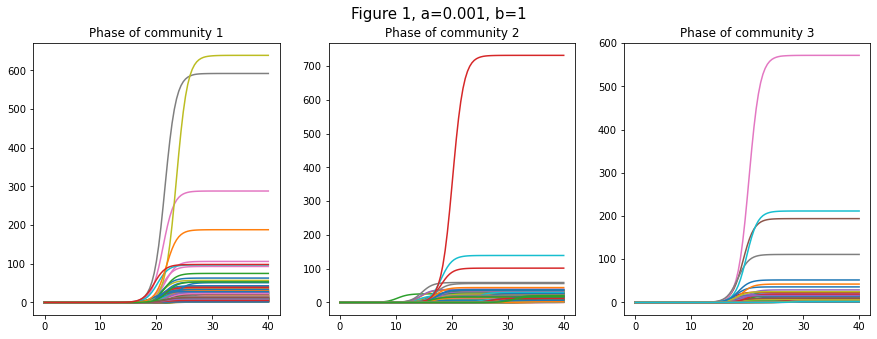

In [8]:
s = spectralW(W)[0]
s1 = spectralW3(W, s, -1)

iter1 = part2(W,T=40,Nt=100,i0=2,y0=0.001,a=0.001,b=1)
t1 = iter1[0]
y1 = iter1[1]

# Plotting the phase distribution for each community where a=0.001, b=1
fig1 = plt.figure(figsize=(15, 5))
fig1.suptitle('Figure 1, a=0.001, b=1', fontsize='15')

ax1 = plt.subplot(1, 3, 1)
ax1.set_title('Phase of community 1')
for i in range(N):
    if s1[i] == 1:
        plt.plot(t1, y1[:,i])
        
ax1 = plt.subplot(1, 3, 2)
ax1.set_title('Phase of community 2')
for i in range(N):
    if s1[i] == -10:
        plt.plot(t1, y1[:,i])

ax1 = plt.subplot(1, 3, 3)
ax1.set_title('Phase of community 3')
for i in range(N):
    if s1[i] == 10:
        plt.plot(t1, y1[:,i])


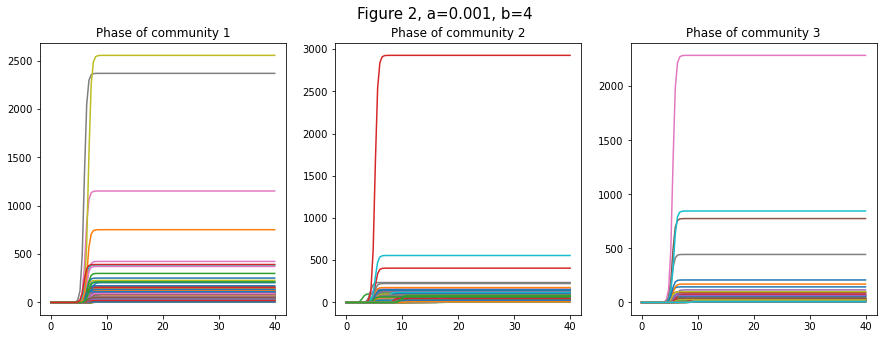

In [9]:
# Plotting the phase distribution for each community where a=0.001, b=4
iter2 = part2(W,T=40,Nt=100,i0=2,y0=0.001,a=0.001,b=4)
t2 = iter2[0]
y2 = iter2[1]

fig2 = plt.figure(figsize=(15, 5))
fig2.suptitle('Figure 2, a=0.001, b=4', fontsize='15')

ax1 = plt.subplot(1, 3, 1)
ax1.set_title('Phase of community 1')
for i in range(467):
    if s1[i] == 1:
        plt.plot(t2, y2[:,i])
        
ax1 = plt.subplot(1, 3, 2)
ax1.set_title('Phase of community 2')
for i in range(467):
    if s1[i] == -10:
        plt.plot(t2, y2[:,i])

ax1 = plt.subplot(1, 3, 3)
ax1.set_title('Phase of community 3')
for i in range(467):
    if s1[i] == 10:
        plt.plot(t2, y2[:,i])

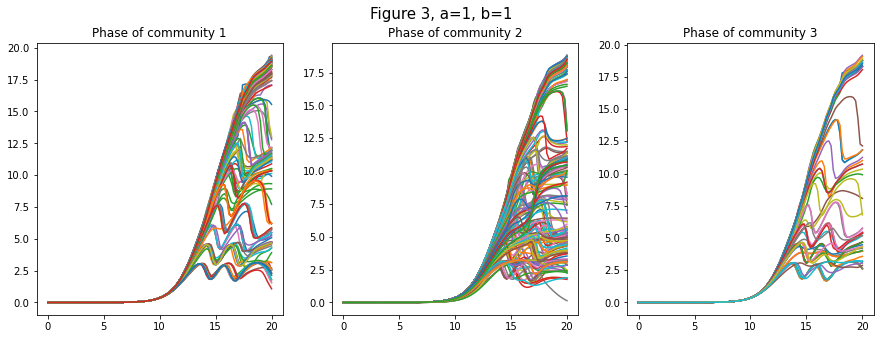

In [10]:
# Plotting the phase distribution for each community where a=1, b=1
iter3 = part2(W,T=20,Nt=100,i0=2,y0=0.001,a=1,b=1)
t3 = iter3[0]
y3 = iter3[1]

fig3 = plt.figure(figsize=(15, 5))
fig3.suptitle('Figure 3, a=1, b=1', fontsize='15')

ax1 = plt.subplot(1, 3, 1)
ax1.set_title('Phase of community 1')
for i in range(467):
    if s1[i] == 1:
        plt.plot(t3, y3[:,i])
        
ax1 = plt.subplot(1, 3, 2)
ax1.set_title('Phase of community 2')
for i in range(467):
    if s1[i] == -10:
        plt.plot(t3, y3[:,i])

ax1 = plt.subplot(1, 3, 3)
ax1.set_title('Phase of community 3')
for i in range(467):
    if s1[i] == 10:
        plt.plot(t3, y3[:,i])

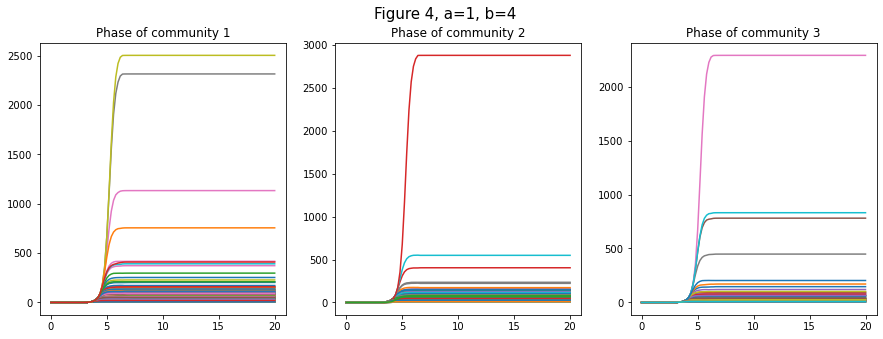

In [11]:
# Plotting the phase distribution for each community where a=1, b=4
iter4 = part2(W,T=20,Nt=100,i0=2,y0=0.001,a=1,b=4)
t4 = iter4[0]
y4 = iter4[1]

fig4 = plt.figure(figsize=(15, 5))
fig4.suptitle('Figure 4, a=1, b=4', fontsize='15')

ax1 = plt.subplot(1, 3, 1)
ax1.set_title('Phase of community 1')
for i in range(467):
    if s1[i] == 1:
        plt.plot(t4, y4[:,i])
        
ax1 = plt.subplot(1, 3, 2)
ax1.set_title('Phase of community 2')
for i in range(467):
    if s1[i] == -10:
        plt.plot(t4, y4[:,i])

ax1 = plt.subplot(1, 3, 3)
ax1.set_title('Phase of community 3')
for i in range(467):
    if s1[i] == 10:
        plt.plot(t4, y4[:,i])

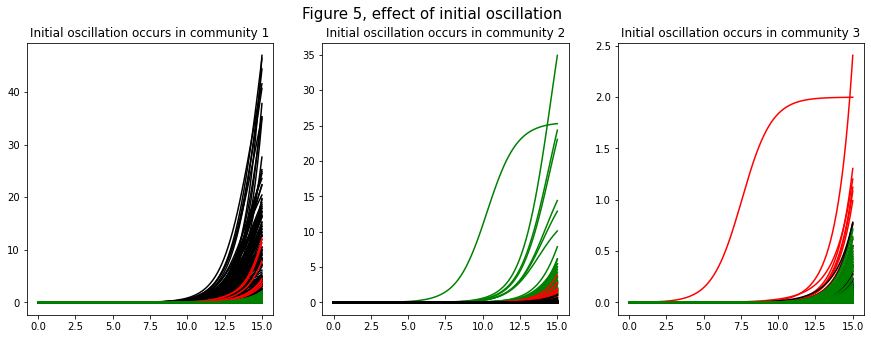

In [12]:
fig5 = plt.figure(figsize=(15, 5))
fig5.suptitle('Figure 5, effect of initial oscillation', fontsize='15')

iter5 = part2(W,T=15,Nt=100,i0=461,y0=0.001,a=0.001,b=1)
t5 = iter5[0]
y5 = iter5[1]

ax1 = plt.subplot(1, 3, 1)
ax1.set_title('Initial oscillation occurs in community 1')
for i in range(N):
    if s1[i] == 1:
        plt.plot(t5, y5[:,i], color='black')
for i in range(N):
    if s1[i] == 10:
        plt.plot(t5, y5[:,i], color='red')
for i in range(N):
    if s1[i] == -10:
        plt.plot(t5, y5[:,i], color='green')

iter6 = part2(W,T=15,Nt=100,i0=2,y0=0.001,a=0.001,b=1)
t6 = iter6[0]
y6 = iter6[1]

ax1 = plt.subplot(1, 3, 2)
ax1.set_title('Initial oscillation occurs in community 2')
for i in range(N):
    if s1[i] == -10:
        plt.plot(t6, y6[:,i], color='green')
for i in range(N):
    if s1[i] == 10:
        plt.plot(t6, y6[:,i], color='red')
for i in range(N):
    if s1[i] == 1:
        plt.plot(t6, y6[:,i], color='black')

        
iter7 = part2(W,T=15,Nt=461,i0=15,y0=0.001,a=0.001,b=1)
t7 = iter7[0]
y7 = iter7[1]
ax1 = plt.subplot(1, 3, 3)
ax1.set_title('Initial oscillation occurs in community 3')
for i in range(N):
    if s1[i] == 10:
        plt.plot(t7, y7[:,i], color='red')
for i in range(N):
    if s1[i] == 1:
        plt.plot(t7, y7[:,i], color='black')     
for i in range(N):
    if s1[i] == -10:
        plt.plot(t7, y7[:,i], color='green')

# Discussion for Q4
- In figures 1-4, we have plotted the graphs of the four systems, split by the three communities. The $T$ and $Nt$ values in each system are chosen such that the graphs are plotted to the maximum capability of the machine. We can observe that for 3 of the systems, where $a=0.001, b=1$, $a=0.001, b=4$ and $a=1, b=4$, the graphs all converge towards an eventual constant value after some $t$, the respective $t$ values for each system being approximately $25$, $7$ and $7$. The graphs show a somewhat simoidal behaviour, where the values increase slowly initially, then accelerates to a rapid growth before decelerating and reaching a steady state again.

- However, for the case where $a=1$ and $b=1$, the behaviour of graphs differ. Although it also has a slow initial acceleration phase, just like the other systems, nevertheless, after approximately $t=12$, the lines diverge significantly and show no sign of converging in the computed domain. 

- In figures 1-4, the graphs for different communities have very similar structures; for $a=0.001, b=1$, $a=0.001, b=4$ and $a=1, b=4$, they all converge to steady states at approximately the same time. The only notable difference we can observe is when $a=1, b=1$, the divergence pattern for the different communities seem to somewhat differ. 

- In figure 5, we investigated the effect of the location of the initial oscillation on the system. By varying the value of $y0$, i.e. the node with the initial oscillation, we have developed three different graphs; the nodes in community 1 by black-coloured lines, nodes in community 2 by green-coloured lines, and nodes in community 3 by red-coloured lines. We can observe that, if the initial oscillation occurs in community 1, the nodes in community 1 has a much greater initial accleration than the nodes in community 2 and community 3; similar observations can be made when the initial oscillation occurs in communities 2 and 3 as well. 

- Therefore, we can say that, the community structure doesn't effect the results in the long run for systems that converge to steady states, as the graphs for each community all have similar structures to each other and converge to steady states at approximately the same time; however, in the short run, the location of the initial oscillation will have an effect on the magnitude of activities of the nodes.

**5.** (5 pts) Analyze the key trends observed in the results presented for question 4. You should provide clear connections between the observed computational results and the mathematical properties of the problem being solved and of the provided network. Add relevant code and discussion in the cell below. You may include up to 4 additional figures to support your discussion; you may also design your figures for question 4. so that they can be referred to here. You are not required to provide further discussion of the community structure.

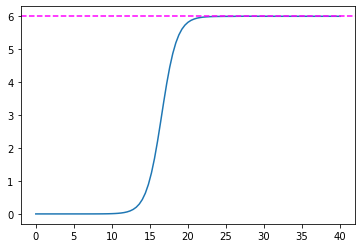

In [13]:
# Plotting solution curve of node 101 and the straight line y = k_til[40]*4 on the same figure when a=0.001, b=1
plt.figure()
y = (iter1[1])[:,40]
plt.plot(t1, y)

k_til = np.zeros(467)
for i in range(467):
    k_til[i-1] = np.sum(W[i-1,])
    
plt.axhline(k_til[40], color='magenta', linestyle='--');

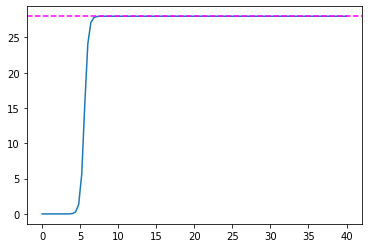

In [14]:
# Plotting solution curve of node 101 and the straight line y = k_til[100]*4 on the same figure when a=0.001, b=4
plt.figure()
y = (iter2[1])[:,100]
plt.plot(t1, y)
    
plt.axhline(k_til[100]*4, color='magenta', linestyle='--');

### Discussion for Q5
- In the figures plotted in Q4, there are some trends which we can observe. For some figures, the solution curves for each $y_i$ appear to tend towards constant values when $t$ becomes large. This trend can be explained by considering the equation for $\frac{dy_i}{dt}$. 
- From Q3, we have obtained that: 
$$\frac{dy_i}{dt}=y_i \times (b-\frac{y_i}{\tilde{k}_i})+ \alpha \sum_{j=1}^{N} W_{ij} \sin(y_j-y_i)$$. 

- If $\alpha$ is very small, then the coupling term, (i.e. the latter term of RHS of the differential equation), would contribute very little to the final solution, as $\alpha \sum_{j=1}^{N} W_{ij} \sin(y_j-y_i) \approx 0$ when $0 \leq \alpha << 1$. Hence, we can approximate $\frac{dy_i}{dt}$ to be when $\alpha$ is very small: 
$$\frac{dy_i}{dt} \approx y_i \times (b-\frac{y_i}{\tilde{k}_i})$$


- The solution to this approximated differential equation should be very close to the real solution; the approximated ODE has solution of the following form:
$$y_i(t) = \frac{T b \tilde{k}_i \times exp(bt)}{b \tilde{k}_i + T \times (exp(bt-1))} = \frac{b \tilde{k}_i}{1+(\frac{b \tilde{k}_i-T}{T})exp(-bt)}$$


- $T$ is a constant that is dependent on the initial conditions for the differential equation.
- The solution is actually in the form of a logistic function. As $t$ becomes large, the equation above tends towards the value $b \tilde{k}_i$. Since we expect the original solution to be very close to the approximated solution, we can therefore say that the original equation should also asymptote towards $b \tilde{k}_i$. In the above figures, I have plotted the solution curve for node 41 and the line $y=b \tilde{k}_{41}$ for $a=0.001,b=1$ and also the solution curve for node 101 and the line $y=b \tilde{k}_{101}$ for $a=0.001, b=4$; we can clearly see that in both cases, when $t$ becomes large, the two lines become overlapped, which supports our theory that the graphs should asymptote towards $b \tilde{k}_i$.
- A similar argument follows for why $a=1, b=4$ approach to a steady state when $t$ becomes large, as $a$ is relatively small compared to $b$ and the solution will still be primarily determined by the value of the first term.

### Further guidance

* You should submit both your completed Jupyter notebook and *either* a pdf version or html version of your notebook (generated using File --- Download as). If you cannot generate a pdf, try installing latex first, or submit an html version instead.
    To submit your assignment, go to the module Blackboard page and click on "Project 2". There will be an option to attach your completed Jupyter notebook and pdf/html file to your submission. (these should be named *project2.ipynb* and *project2.pdf* or *project2.html*). After attaching the notebook, submit your assignment, and include the message, "This is my own work unless indicated otherwise." to confirm that the submission represents your individual work.
* You may use numpy, scipy, and matplotlib as needed. You may use networkx as needed **except** for question 1.(a) where it should not be used. Please do not any use any other packages without explicit permission.
* Marking will be based on the correctness of your work, the efficiency of your code for question 1.(a), and the degree to which your submission reflects a good understanding of the material covered up to the release of this assignment. For open-ended questions, we are particularly interested in your ability to identify and explain important properties and trends, and exhaustive descriptions are not needed. While creative ideas based on class material is welcome, you are not expected to base your work on new ideas/concepts/methods that have not been covered (and it is unlikely that credit will be given for such work).
* Open-ended questions require sensible time-management on your part. Do not spend so much time on this assignment that it interferes substantially with your other modules. If you are concerned that your approach to the assignment may require an excessive amount of time, please get in touch with the instructor. 
* Questions on the assignment should be asked in private settings. This can be a "private" question on Ed (which is distinct from "anonymous"), asking for a one-on-one meeting during office hours, or by arrangement with your Problem class instructor.
* Please regularly backup your work. For example, you could keep an updated copy of your notebook on OneDrive.
* In order to assign partial credit, we need to understand what your code is doing, so please add comments to the code to help us.
* It may be helpful to initally develop your code in a Python module (outside of a function) and run it in a qtconsole (or similar Python terminal) so that you can readily access the values of the variables you are using.
* Feel free to use/modify codes that I have provided during the term so far.
